In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.word2vec import PathLineSentences, LineSentence, Word2Vec
from pathlib import Path
import networkx as nx
from sklearn import model_selection, linear_model, preprocessing, svm
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
%matplotlib inline


**Load random walks from output files**

In [25]:
def computeTheoreticalProbs(file, nodes):
    g_dir = "/Users/Ganymedian/Desktop/dynamic-rw/output/karate-stream/"
    G = nx.read_edgelist(g_dir+file, nodetype=int)
    A = nx.adjacency_matrix(G,nodelist=sorted(nodes)).toarray()
    d_w = A.sum(axis=1)
    M_theory = A.T / d_w
    return M_theory

In [26]:
def read_walks(m, e, wl, nw):
    fname = "s1-" + m + "-wl" + str(wl) + "-nw" + str(nw) + "-e" + str(e)
    rws = np.concatenate([
        np.loadtxt(f.open(), delimiter='\t', dtype=int)
        for f in rw_location.glob(fname + "-*.txt")
        if f.stat().st_size > 0
    ])
    ars = np.vsplit(rws, 5)
    print(ars[0].shape)
    return ars

[  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106 108
 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142 144
 146 148 150 152 154 156]
m1
(200, 4)
(400, 4)
(500, 4)
(700, 4)
(800, 4)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


(900, 4)
(1100, 4)
(1300, 4)
(1400, 4)
(1400, 4)
(1500, 4)
(1600, 4)
(1700, 4)
(1900, 4)
(2100, 4)
(2100, 4)
(2200, 4)
(2200, 4)
(2300, 4)
(2300, 4)
(2400, 4)
(2500, 4)
(2500, 4)
(2500, 4)
(2500, 4)
(2500, 4)
(2600, 4)
(2600, 4)
(2600, 4)
(2600, 4)
(2700, 4)
(2700, 4)
(2700, 4)
(2800, 4)
(2800, 4)
(2900, 4)
(2900, 4)
(2900, 4)
(2900, 4)
(2900, 4)
(2900, 4)
(2900, 4)
(2900, 4)
(2900, 4)
(2900, 4)
(2900, 4)
(3000, 4)
(3000, 4)
(3000, 4)
(3100, 4)
(3100, 4)
(3100, 4)
(3100, 4)
(3100, 4)
(3200, 4)
(3200, 4)
(3200, 4)
(3200, 4)
(3200, 4)
(3200, 4)
(3200, 4)
(3200, 4)
(3200, 4)
(3200, 4)
(3200, 4)
(3200, 4)
(3200, 4)
(3200, 4)
(3300, 4)
(3400, 4)
(3400, 4)
(3400, 4)
(3400, 4)
(3400, 4)
(3400, 4)
(3400, 4)
(3400, 4)
(3400, 4)
m2
(200, 4)
(400, 4)
(500, 4)
(700, 4)
(800, 4)
(900, 4)
(1100, 4)
(1300, 4)
(1400, 4)
(1400, 4)
(1500, 4)
(1600, 4)
(1700, 4)
(1900, 4)
(2100, 4)
(2100, 4)
(2200, 4)
(2200, 4)
(2300, 4)
(2300, 4)
(2400, 4)
(2500, 4)
(2500, 4)
(2500, 4)
(2500, 4)
(2500, 4)
(2600, 4)
(260

<function matplotlib.pyplot.show>

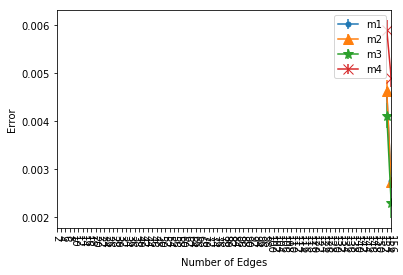

In [27]:
methods = ["m1", "m2", "m3", "m4"]
nmethods = len(methods)
num_runs = 5
wl = 3
nw = 100
rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/output/karate-stream")
formats=['.-', '^-', '*-','x-']
n_nodes = 34
n_edges = 156
nodes = np.arange(1,n_nodes+1)
edges = np.arange(2,n_edges+1, 2)
print(edges)

for mm in range(nmethods):
    print(methods[mm])
    all_errors = []
    for ee in edges:
        runs = read_walks(methods[mm], ee, wl, nw)
        graph_file = methods[mm] + "-g-e" + str(ee) + ".txt"
        M_theory = computeTheoreticalProbs(graph_file, nodes)
        errors = []
        for rr in range(num_runs):
            M_empirical = np.zeros((n_nodes, n_nodes))
            for walk in runs[rr]:
                for kk in range(wl - 1):
                    M_empirical[walk[kk] - 1, walk[kk + 1] - 1] += 1

            n_samples = M_empirical.sum()
            M_empirical = M_empirical.T / np.maximum(M_empirical.sum(axis=1), 1)

            errors.append(np.abs(M_theory - M_empirical).mean())

        all_errors.append(errors)

    means = np.mean(all_errors,axis=1)
    stdv = np.std(all_errors, axis=1)
    plt.errorbar(edges, means, yerr=stdv, fmt=formats[mm], label=methods[mm], ms=10)
    plt.xticks(edges, rotation=-90)
    plt.legend()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel("Number of Edges")
plt.ylabel("Error")
plt.show